In [154]:
import numpy as np
import matplotlib.pyplot as plt
import nufit
from scipy.special import eval_laguerre
from scipy.optimize import curve_fit

In [155]:
data = np.load("RMFK_Results/mass-300-life-0.912.npz", allow_pickle = True)

In [156]:
data['e']

array([array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
               5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
              11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
              16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
              22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
              27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
              33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
              38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
              44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
              49.5, 50. , 50.5, 51. , 51.5, 52. , 52.5, 53. , 53.5, 54. , 54.5,
              55. , 55.5, 56. , 56.5, 57. , 57.5, 58. , 58.5, 59. , 59.5, 60. ,
              60.5, 61. , 61.5, 62. , 62.5, 63. , 63.5, 64. , 64.5, 65. , 65.5,
              66. , 66.5, 67. , 67.5, 68

In [157]:
data['fe']

array([array([5.00000000e-01, 3.77548215e-01, 2.68946707e-01, 1.82428969e-01,
              1.19205077e-01, 7.58596039e-02, 4.74268319e-02, 2.93128706e-02,
              1.79866309e-02, 1.09872154e-02, 6.69303057e-03, 4.07025585e-03,
              2.47270054e-03, 1.50123282e-03, 9.11084202e-04, 5.52800205e-04,
              3.35374538e-04, 2.03435980e-04, 1.23400307e-04, 7.48498695e-05,
              4.54001825e-05, 2.75371558e-05, 1.67023485e-05, 1.01305764e-05,
              6.14454387e-06, 3.72687193e-06, 2.26047068e-06, 1.37104921e-06,
              8.31585787e-07, 5.04383633e-07, 3.05924923e-07, 1.85553309e-07,
              1.12544047e-07, 6.82615813e-08, 4.14028422e-08, 2.51121539e-08,
              1.52313281e-08, 9.23828979e-09, 5.60331955e-09, 3.39859334e-09,
              2.06135606e-09, 1.25027868e-09, 7.58334199e-10, 4.59954062e-10,
              2.78976921e-10, 1.69208469e-10, 1.02630375e-10, 6.22486214e-11,
              3.77557899e-11, 2.29001003e-11, 1.38896471e-11, 8.

In [158]:

data.files

['mass',
 'mixing',
 'lifetime',
 'neff',
 'scalefactors',
 'time',
 'temp',
 'Tcm',
 'e',
 'fe',
 'NumbDensityDist',
 'decayrate',
 'collisionrate',
 'n_p_rate',
 'n_p_rate_SM',
 'p_n_rate',
 'p_n_rate_SM',
 'Hubble']

In [159]:
eps = data['e'][-1]
f = data['fe'][-1]

In [160]:
cdf = nufit.cdf_faster(eps, f)

(0.0, 1400.0)

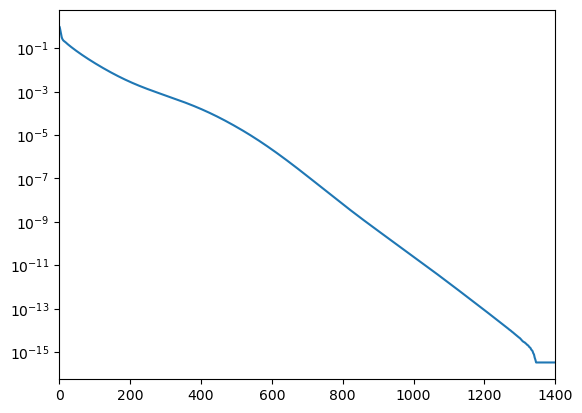

In [161]:
comp_cdf = (1-cdf)
plt.semilogy(eps, comp_cdf)
plt.xlim(0, 1400)

In [162]:
log_cdf = np.log(comp_cdf)
k = -(np.gradient(log_cdf, eps))

In [304]:
k_ind = np.where((comp_cdf <= (1e-2)))[0][0]
k_val = k[k_ind]
print(comp_cdf[k_ind])
print(k_val)

0.009796872638373588
0.021029186331034788


In [305]:
y = eps * k_val
def laguerre_fit(y, *w):
    total_sum = np.zeros(len(y))
    for i in range(len(w)):
        total_sum += w[i] * eval_laguerre(i, y)
    return total_sum * np.exp(-y)

In [306]:
w_guess = [0]
best_w, cov = curve_fit(laguerre_fit, y, comp_cdf, w_guess)  

In [307]:
fitted = laguerre_fit(y, *best_w)
print(best_w)

[0.45957752]


/var/folders/kl/cgktwqnn1f7_94dngb87_j8c0000gs/T/ipykernel_4432/445447494.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(1e-19, 0)


(1e-19, 17.70074448870314)

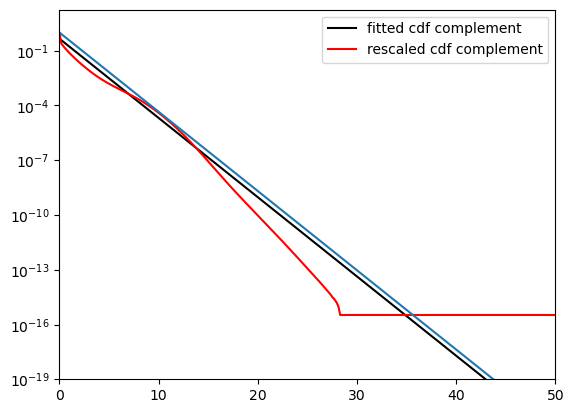

In [308]:
plt.semilogy(y, fitted, color = 'black', label = 'fitted cdf complement')
plt.semilogy(y, comp_cdf, color = 'red', label = 'rescaled cdf complement')
plt.plot(y, np.exp(-y))
plt.legend()
#plt.semilogy(eps, comp_cdf)
plt.xlim(0, 50)
plt.ylim(1e-19, 0)